In [1]:
import json
from collections import defaultdict
import string
from nltk.stem.porter import *
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy
import sklearn
import gzip
import folium
import geopandas as gpd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
import random
import math

In [2]:
f = gzip.open("review-Alaska.json.gz")
reviewDataset = []
for l in f:
    reviewDataset.append(json.loads(l))

In [3]:
len(reviewDataset)

1051246

In [4]:
reviewDataset=reviewDataset[:50000]

In [5]:
reviewDataset[1]

{'user_id': '108233908345184666082',
 'name': 'Mitch Eichman',
 'time': 1503373018846,
 'rating': 5,
 'text': 'This was an amazing RV camping experience with good electric water - the owner even pumped our septic. They have a great little store with groceries and souvenirs - we got to know some of the other campers and every where we went they were very happy with the site. We used laundry and shower area and everything was very clean. Enjoy!',
 'pics': None,
 'resp': None,
 'gmap_id': '0x56b646ed2220b77f:0xd8975e316de80952'}

In [6]:
BusinessReviewPerUser=defaultdict(list)

for d in reviewDataset:
    if d['text']==None:
        continue
    BusinessReviewPerUser[d['user_id']].append([d['gmap_id'],d['text']])

In [45]:
BusinessReviewPerUser_2=defaultdict(list)

for d in reviewDataset:
    if d['text']==None or len(d['text'])<50:
        continue
    BusinessReviewPerUser_2[d['user_id']].append([d['gmap_id'],d['text']])

In [46]:
BusinessReviewPerUser_3=defaultdict(list)
for i in BusinessReviewPerUser_2:
    if len(BusinessReviewPerUser_2[i])>=10:
        BusinessReviewPerUser_3[i]=BusinessReviewPerUser_2[i]

In [47]:
BusinessReviewPerUser_3

defaultdict(list,
            {'116609473380111060245': [['0x5406038d706891a9:0x3b0075d07a52d830',
               'I must get the salmon dip every time I visit Petersburg.'],
              ['0x5406038d706891a9:0x3b0075d07a52d830',
               'I must get the salmon dip every time I visit Petersburg.'],
              ['0x5408ca3779a8d2e9:0x8e07bd939c873496',
               'Great service.  Needs more indoor or covered space for receiving.'],
              ['0x5408cbb18d668e35:0x2e05f188aa7e9ce7',
               'Small wooded park on the beach close to town.  Stunning view.  Small fenced-in play area.  Restrooms open during the warmer months.  Three smaller covered areas with a picnic table and fire pit.  One large covered area with two or three picnic tables and a large fire pit.  Great place to have a picnic, get some fresh air, and/or comb the beach.'],
              ['0x540467a3802bb6b7:0xd895c7f5818a3f51',
               'A small facility that offers a quick, informative tour of 

In [7]:
BusinessReviewPerUser_1=defaultdict(list)
for i in BusinessReviewPerUser:
    if len(BusinessReviewPerUser[i])>=10:
        BusinessReviewPerUser_1[i]=BusinessReviewPerUser[i]

In [8]:
BusinessReviewPerUser_1

defaultdict(list,
            {'112200908444782890910': [['0x56c89632d94b816d:0x36d53dd6adaede05',
               'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'],
              ['0x56c89632d94b816d:0x36d53dd6adaede05',
               'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'],
              ['0x56c897dba1add357:0x1c4629a3bf137503', 'Great selection'],
              ['0x56c8bd57bdfe4263:0xd70631d0a98b125f', 'Faith'],
              ['0x56c8962ba4b8eab9:0xdc0d24d71b849b40', 'Very nice park!'],
              ['0x56c8977406a185e3:0xaf88e28621293c47', 'Great Work!'],
              ['0x56c897f388eb4b25:0x6df3c3de91db6517', 'Great Park!'],
              ['0x56c89831c3f340e7:0x76c6ce2ddee2de4c', 'Funtime'],
              ['0x56c8999a616fbc65:0xce720f8b8bf3b566',
               'Great bikes and customer service.'],
              ['0x56c897c82598d177:0xd271bcf1a5ba7345', 'Save'],
              ['0x56c897358c0

In [9]:
BusinessReview_neg=[]
for i in BusinessReviewPerUser_1:
    reviewedBusinessSet=[]
    for j in BusinessReviewPerUser_1[i]:
        reviewedBusinessSet.append(j[0])
    for j in reviewDataset:
        if i!=j['user_id'] and j['gmap_id'] not in reviewedBusinessSet and j['text']!=None:
           BusinessReview_neg.append([j['gmap_id'],j['text']])

In [48]:
BusinessReview_neg_3=[]
for i in BusinessReviewPerUser_3:
    reviewedBusinessSet=[]
    for j in BusinessReviewPerUser_3[i]:
        reviewedBusinessSet.append(j[0])
    for j in reviewDataset:
        if i!=j['user_id'] and j['gmap_id'] not in reviewedBusinessSet and j['text']!=None and len(j['text'])>=50:
            BusinessReview_neg_3.append([j['gmap_id'],j['text']])

In [49]:
for i in BusinessReviewPerUser_3:
    flag=random.choice(BusinessReview_neg_3)
    print(flag)
    BusinessReviewPerUser_3[i].append(flag)

['0x56c89626aaaaaaab:0x56c9b8bf85354624', 'Super nice staff, easy cleaning, and great hours that fit my schedule!']
['0x56c899dade7294f1:0x8668ac0b0fc4e5a5', 'Been going to April since she was at Catelyns place: April goes above and beyond for her clients! She makes sure that they always leave happy and satisfied with her services. April is such a sweet, kind and loving soul. I will never have another wax lady. She’s my go to for life. BOOK WITH HER!! ❤️❤️❤️']
['0x56c8e08581e73d0b:0xbad43da08901fe1b', 'My car was in and out within 2 days.  I needed a ride to my car rental, they provided. They also kept me posted on car by texting and calling.   So kudos to Fix It Auto.']
['0x5400df84770c3e8f:0xcff73d25262da9f1', 'Before going to Dr. Pinney’s office dental exams would have me seeing visions of Steve Martin and dreading the experience. I now look forward to my visits, the whole staff at Dr. Pennies has is kind and professional, and I look forward to being a patient there for years to com

In [10]:
for i in BusinessReviewPerUser_1:
    flag=random.choice(BusinessReview_neg)
    print(flag)
    BusinessReviewPerUser_1[i].append(flag)

['0x56c897b816645d5b:0x1d09b8460d57a7db', 'Great job helping with my refrigerator and stove, even found a problem that a different technician made a mistake on and fixed it for free.  Seems like an honest guy who has been in the business and willing to work hard.']
['0x56c89940e51d7375:0xeb800d5fe82cbd11', 'Dave provided outstanding service.   plane was delayed 4 hours late into the night and he still provided us with a ride with no additional charges.  extremely friendly and very knowledgeable of the area.  he was. like our own personal tour guide.  the only taxi I will use in the future.']
['0x56c8965400000001:0x759d51488fbf3694', 'I will never debate the important access and resources that Planned Parenthood offers to women. Indispensable. This review is not over that.\n\nPlanned Parenthood Anchorage are intentionally deceptive in the way they bill and take money from people who seek out their assistance. They are capable of slyly reducing the cost of services up front only to bill 

In [11]:
BusinessReviewPerUser_1

defaultdict(list,
            {'112200908444782890910': [['0x56c89632d94b816d:0x36d53dd6adaede05',
               'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'],
              ['0x56c89632d94b816d:0x36d53dd6adaede05',
               'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'],
              ['0x56c897dba1add357:0x1c4629a3bf137503', 'Great selection'],
              ['0x56c8bd57bdfe4263:0xd70631d0a98b125f', 'Faith'],
              ['0x56c8962ba4b8eab9:0xdc0d24d71b849b40', 'Very nice park!'],
              ['0x56c8977406a185e3:0xaf88e28621293c47', 'Great Work!'],
              ['0x56c897f388eb4b25:0x6df3c3de91db6517', 'Great Park!'],
              ['0x56c89831c3f340e7:0x76c6ce2ddee2de4c', 'Funtime'],
              ['0x56c8999a616fbc65:0xce720f8b8bf3b566',
               'Great bikes and customer service.'],
              ['0x56c897c82598d177:0xd271bcf1a5ba7345', 'Save'],
              ['0x56c897358c0

In [12]:
BusinessReviewPerUser_1['112200908444782890910']

[['0x56c89632d94b816d:0x36d53dd6adaede05',
  'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'],
 ['0x56c89632d94b816d:0x36d53dd6adaede05',
  'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'],
 ['0x56c897dba1add357:0x1c4629a3bf137503', 'Great selection'],
 ['0x56c8bd57bdfe4263:0xd70631d0a98b125f', 'Faith'],
 ['0x56c8962ba4b8eab9:0xdc0d24d71b849b40', 'Very nice park!'],
 ['0x56c8977406a185e3:0xaf88e28621293c47', 'Great Work!'],
 ['0x56c897f388eb4b25:0x6df3c3de91db6517', 'Great Park!'],
 ['0x56c89831c3f340e7:0x76c6ce2ddee2de4c', 'Funtime'],
 ['0x56c8999a616fbc65:0xce720f8b8bf3b566',
  'Great bikes and customer service.'],
 ['0x56c897c82598d177:0xd271bcf1a5ba7345', 'Save'],
 ['0x56c897358c0c3e55:0xce1d1a0cac0f0b0', 'Fun'],
 ['0x56c897c346733dd5:0xe0e8f41d2c25ea3e', 'Great selection'],
 ['0x56c896324589e501:0x3341300ec3f31001', 'Good selection and price'],
 ['0x56c8998365b6be7d:0x259a4355d76b243e', 'Good food'],

In [13]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in reviewDataset:
    if d['text']==None:
        continue
    r = ''.join([c for c in d['text'].lower() if not c in punctuation])
    for w in r.split():
        wordCount[w] += 1

In [14]:
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [16]:
counts[:5]

[(59572, 'and'), (55378, 'the'), (40001, 'to'), (34152, 'i'), (32120, 'a')]

In [17]:
words = [x[1] for x in counts[:1000]]

In [18]:
words[:5]

['and', 'the', 'to', 'i', 'a']

In [19]:
df = defaultdict(int)
for d in reviewDataset:
    if d['text']==None:
        continue
    r = ''.join([c for c in d['text'].lower() if not c in punctuation])
    for w in set(r.split()):
        df[w] += 1

In [21]:
rev = BusinessReviewPerUser_1['112200908444782890910'] # Query review
rev

[['0x56c89632d94b816d:0x36d53dd6adaede05',
  'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'],
 ['0x56c89632d94b816d:0x36d53dd6adaede05',
  'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'],
 ['0x56c897dba1add357:0x1c4629a3bf137503', 'Great selection'],
 ['0x56c8bd57bdfe4263:0xd70631d0a98b125f', 'Faith'],
 ['0x56c8962ba4b8eab9:0xdc0d24d71b849b40', 'Very nice park!'],
 ['0x56c8977406a185e3:0xaf88e28621293c47', 'Great Work!'],
 ['0x56c897f388eb4b25:0x6df3c3de91db6517', 'Great Park!'],
 ['0x56c89831c3f340e7:0x76c6ce2ddee2de4c', 'Funtime'],
 ['0x56c8999a616fbc65:0xce720f8b8bf3b566',
  'Great bikes and customer service.'],
 ['0x56c897c82598d177:0xd271bcf1a5ba7345', 'Save'],
 ['0x56c897358c0c3e55:0xce1d1a0cac0f0b0', 'Fun'],
 ['0x56c897c346733dd5:0xe0e8f41d2c25ea3e', 'Great selection'],
 ['0x56c896324589e501:0x3341300ec3f31001', 'Good selection and price'],
 ['0x56c8998365b6be7d:0x259a4355d76b243e', 'Good food'],

In [23]:
rev[0][1]

'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!'

In [27]:
tf = defaultdict(int)
r = ''.join([c for c in rev[0][1].lower() if not c in punctuation])
for w in r.split():
    # Note = rather than +=, different versions of tf could be used instead
    tf[w] = 1
    
tfidf = dict(zip(words,[tf[w] * math.log2(len(reviewDataset) / df[w]) for w in words]))
tfidfQuery = [tf[w] * math.log2(len(reviewDataset) / df[w]) for w in words]

In [28]:
maxTf = [(tf[w],w) for w in words]
maxTf.sort(reverse=True)
maxTfIdf = [(tfidf[w],w) for w in words]
maxTfIdf.sort(reverse=True)

In [29]:
maxTfIdf[:10]

[(7.101845834238116, 'room'),
 (6.912672948202525, 'makes'),
 (6.773590119378742, 'stay'),
 (5.6937610956010385, 'being'),
 (5.224856724343459, 'know'),
 (4.907467789071264, 'other'),
 (4.237319519569553, 'nice'),
 (3.9040080870753973, 'get'),
 (3.547594336716321, 'friendly'),
 (1.5938769870669334, 'to')]

In [30]:
def Cosine(x1,x2):
    numer = 0
    norm1 = 0
    norm2 = 0
    for a1,a2 in zip(x1,x2):
        numer += a1*a2
        norm1 += a1**2
        norm2 += a2**2
    if norm1*norm2:
        return numer / math.sqrt(norm1*norm2)
    return 0

In [31]:
similarities = []
for rev2 in rev[1:]:
    print(rev2[1])
    tf = defaultdict(int)
    r = ''.join([c for c in rev2[1].lower() if not c in punctuation])
    for w in r.split():
        # Note = rather than +=
        tf[w] = 1
    tfidf2 = [tf[w] * math.log2(len(reviewDataset) / df[w]) for w in words]
    similarities.append((Cosine(tfidfQuery, tfidf2), rev2[1],rev2[0]))

Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!
Great selection
Faith
Very nice park!
Great Work!
Great Park!
Funtime
Great bikes and customer service.
Save
Fun
Great selection
Good selection and price
Good food
Fun hike. Be Bear Aware!
Love the selection!
Great job helping with my refrigerator and stove, even found a problem that a different technician made a mistake on and fixed it for free.  Seems like an honest guy who has been in the business and willing to work hard.


In [32]:
similarities.sort(reverse=True)

In [34]:
similarities[:]

[(1.0,
  'Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!',
  '0x56c89632d94b816d:0x36d53dd6adaede05'),
 (0.12154457272377937,
  'Very nice park!',
  '0x56c8962ba4b8eab9:0xdc0d24d71b849b40'),
 (0.01223659349646221,
  'Great bikes and customer service.',
  '0x56c8999a616fbc65:0xce720f8b8bf3b566'),
 (0.008176622214682952,
  'Good selection and price',
  '0x56c896324589e501:0x3341300ec3f31001'),
 (0.008160562600369181,
  'Great job helping with my refrigerator and stove, even found a problem that a different technician made a mistake on and fixed it for free.  Seems like an honest guy who has been in the business and willing to work hard.',
  '0x56c897b816645d5b:0x1d09b8460d57a7db'),
 (0.0, 'Save', '0x56c897c82598d177:0xd271bcf1a5ba7345'),
 (0.0, 'Love the selection!', '0x56c8bd8715bb6f2b:0xbf1acb6612ca15cd'),
 (0.0, 'Great selection', '0x56c897dba1add357:0x1c4629a3bf137503'),
 (0.0, 'Great selection', '0x56c897c346733dd5:0xe0e8f41d2c25ea3e'),
 (0.0,

In [37]:
sortedSimilarity=[x[2] for x in similarities]

In [38]:
sortedSimilarity

['0x56c89632d94b816d:0x36d53dd6adaede05',
 '0x56c8962ba4b8eab9:0xdc0d24d71b849b40',
 '0x56c8999a616fbc65:0xce720f8b8bf3b566',
 '0x56c896324589e501:0x3341300ec3f31001',
 '0x56c897b816645d5b:0x1d09b8460d57a7db',
 '0x56c897c82598d177:0xd271bcf1a5ba7345',
 '0x56c8bd8715bb6f2b:0xbf1acb6612ca15cd',
 '0x56c897dba1add357:0x1c4629a3bf137503',
 '0x56c897c346733dd5:0xe0e8f41d2c25ea3e',
 '0x56c8977406a185e3:0xaf88e28621293c47',
 '0x56c897f388eb4b25:0x6df3c3de91db6517',
 '0x56c8998365b6be7d:0x259a4355d76b243e',
 '0x56c89831c3f340e7:0x76c6ce2ddee2de4c',
 '0x56c8847a2f6323ff:0x907a2cb7e37febaf',
 '0x56c897358c0c3e55:0xce1d1a0cac0f0b0',
 '0x56c8bd57bdfe4263:0xd70631d0a98b125f']

In [39]:
if rev[-1][0] in sortedSimilarity[len(sortedSimilarity)//2:]:
    print(True)
else:
    print(False)

False


In [50]:
numTrue=0
for i in BusinessReviewPerUser_1:
    rev=BusinessReviewPerUser_1[i]
    tf = defaultdict(int)
    r = ''.join([c for c in rev[0][1].lower() if not c in punctuation])
    for w in r.split():
        # Note = rather than +=, different versions of tf could be used instead
        tf[w] = 1

    tfidf = dict(zip(words,[tf[w] * math.log2(len(rev) / df[w]) for w in words]))
    tfidfQuery = [tf[w] * math.log2(len(rev) / df[w]) for w in words]   
    maxTf = [(tf[w],w) for w in words]
    maxTf.sort(reverse=True)
    maxTfIdf = [(tfidf[w],w) for w in words]
    maxTfIdf.sort(reverse=True)  
    similarities = []
    for rev2 in rev[1:]:
        #print(rev2[1])
        tf = defaultdict(int)
        r = ''.join([c for c in rev2[1].lower() if not c in punctuation])
        for w in r.split():
            # Note = rather than +=
            tf[w] = 1
        tfidf2 = [tf[w] * math.log2(len(rev) / df[w]) for w in words]
        similarities.append((Cosine(tfidfQuery, tfidf2), rev2[1],rev2[0]))
    similarities.sort(reverse=True) 
    sortedSimilarity=[x[2] for x in similarities]
    if rev[-1][0] in sortedSimilarity[len(sortedSimilarity)//2:]:
        numTrue+=1

In [51]:
Accuracy=numTrue/len(BusinessReviewPerUser_1)
Accuracy

0.5970149253731343

In [58]:
numTrue=0
for i in BusinessReviewPerUser_3:
    rev=BusinessReviewPerUser_3[i]
    tf = defaultdict(int)
    r = ''.join([c for c in rev[0][1].lower() if not c in punctuation])
    for w in r.split():
        # Note = rather than +=, different versions of tf could be used instead
        tf[w] = 1

    tfidf = dict(zip(words,[tf[w] * math.log2(len(rev) / df[w]) for w in words]))
    tfidfQuery = [tf[w] * math.log2(len(rev) / df[w]) for w in words]   
    maxTf = [(tf[w],w) for w in words]
    maxTf.sort(reverse=True)
    maxTfIdf = [(tfidf[w],w) for w in words]
    maxTfIdf.sort(reverse=True)  
    similarities = []
    for rev2 in rev[1:]:
        #print(rev2[1])
        tf = defaultdict(int)
        r = ''.join([c for c in rev2[1].lower() if not c in punctuation])
        for w in r.split():
            # Note = rather than +=
            tf[w] = 1
        tfidf2 = [tf[w] * math.log2(len(rev) / df[w]) for w in words]
        similarities.append((Cosine(tfidfQuery, tfidf2), rev2[1],rev2[0]))
    similarities.sort(reverse=True) 
    sortedSimilarity=[x[2] for x in similarities]
    if rev[-1][0] in sortedSimilarity[len(sortedSimilarity)//2:]:
        numTrue+=1

In [59]:
Accuracy=numTrue/len(BusinessReviewPerUser_3)
Accuracy

0.7575757575757576

In [90]:
len(reviewDataset[1]['text'])

335

In [12]:
ratings = [d['rating'] for d in reviewDataset]
lengths = []
for i in reviewDataset:
    if i['text']==None:
        lengths.append(0)
    else:
        lengths.append(len(i['text']))

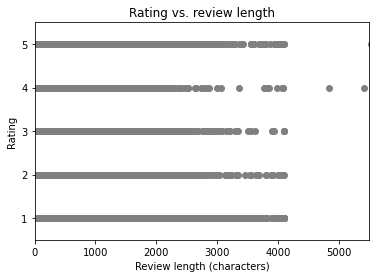

In [14]:
plt.scatter(lengths, ratings, color='grey')
plt.xlim(0, 5500)
plt.ylim(0.5, 5.5)
plt.xlabel("Review length (characters)")
plt.ylabel("Rating")
plt.title("Rating vs. review length")
plt.show()

In [4]:
reviewsPerBusiness=defaultdict(set)
reviewsPerUser=defaultdict(set)
ratingsPerBusiness=defaultdict(set)
BusinessPerUser=defaultdict(set)
ratingDict=defaultdict(set)

for d in reviewDataset:
    user,business = d['user_id'], d['gmap_id']
    reviewsPerBusiness[business].add(d['text'])
    reviewsPerUser[user].add(d['text'])
    BusinessPerUser[user].add(business)
    ratingsPerBusiness[business].add(d['rating'])
    ratingDict[(user,business)] = d['rating'] 

In [91]:
numReviewsPerBusiness=defaultdict(set)
for i in reviewsPerBusiness:
    numReviewsPerBusiness[i]=(len(reviewsPerBusiness[i]))

In [95]:
numReview=[numReviewsPerBusiness[i] for i in numReviewsPerBusiness]
numReview

[18,
 11,
 25,
 21,
 5,
 5,
 10,
 3,
 11,
 31,
 15,
 8,
 7,
 1,
 10,
 3,
 13,
 5,
 10,
 4,
 3,
 1,
 7,
 7,
 4,
 1,
 8,
 13,
 3,
 2,
 1,
 2,
 6,
 3,
 2,
 2,
 1,
 3,
 3,
 12,
 3,
 6,
 7,
 1,
 2,
 6,
 5,
 1,
 1,
 2,
 84,
 11,
 16,
 1,
 1,
 2,
 8,
 4,
 6,
 3,
 3,
 1,
 8,
 4,
 8,
 69,
 28,
 1,
 1,
 8,
 14,
 3,
 254,
 6,
 4,
 85,
 53,
 9,
 3,
 4,
 34,
 8,
 11,
 6,
 2,
 9,
 6,
 8,
 2,
 2,
 45,
 7,
 8,
 4,
 6,
 11,
 1,
 7,
 1,
 5,
 6,
 1,
 4,
 5,
 4,
 8,
 5,
 3,
 8,
 4,
 8,
 14,
 29,
 4,
 8,
 38,
 22,
 19,
 11,
 2,
 1,
 3,
 1,
 2,
 10,
 3,
 1,
 2,
 1,
 2,
 11,
 4,
 2,
 2,
 21,
 8,
 2,
 8,
 4,
 6,
 3,
 5,
 3,
 2,
 2,
 3,
 4,
 1,
 2,
 14,
 4,
 8,
 18,
 8,
 5,
 17,
 9,
 49,
 5,
 2,
 3,
 6,
 25,
 8,
 88,
 16,
 14,
 7,
 1,
 3,
 8,
 8,
 2,
 3,
 4,
 11,
 8,
 10,
 3,
 8,
 5,
 8,
 10,
 11,
 7,
 4,
 3,
 19,
 9,
 28,
 3,
 3,
 2,
 8,
 7,
 14,
 10,
 4,
 1,
 8,
 2,
 3,
 4,
 1,
 5,
 7,
 2,
 5,
 3,
 8,
 5,
 68,
 19,
 5,
 2,
 24,
 3,
 2,
 2,
 6,
 10,
 3,
 2,
 8,
 2,
 2,
 19,
 6,
 5,
 13,
 2,
 3,
 2,
 1,
 4,
 2

In [96]:
avgRating=[avgRatingBusiness[i] for i in numReviewsPerBusiness ]
avgRating

[4.5,
 4.2,
 4.4,
 4.5,
 4.7,
 4.6,
 4.1,
 5,
 2.6,
 3,
 4.8,
 3.8,
 4.8,
 4,
 4.7,
 4.3,
 4.8,
 4.4,
 4.8,
 4,
 3.3,
 5,
 4.3,
 4.1,
 4.6,
 4,
 4.9,
 4.4,
 4.9,
 5,
 5,
 5,
 4.6,
 3.7,
 5,
 5,
 1,
 5,
 4.4,
 5,
 4.7,
 4.7,
 4.6,
 5,
 5,
 3,
 4.7,
 5,
 3,
 5,
 4.9,
 3.7,
 5,
 5,
 5,
 5,
 5,
 4.8,
 5,
 4,
 5,
 5,
 4.1,
 3.6,
 5,
 2.1,
 4.8,
 1,
 5,
 4.7,
 4.4,
 4.8,
 4.9,
 3,
 5,
 4.9,
 5,
 4,
 4.6,
 4.4,
 4.8,
 4.4,
 4.1,
 4.7,
 3,
 4.4,
 4.8,
 4.9,
 4.5,
 4.5,
 3.8,
 3.3,
 4.9,
 3.5,
 5,
 4.7,
 5,
 4.9,
 4,
 4.6,
 4.6,
 5,
 4,
 4.2,
 4.4,
 4.1,
 3.1,
 4.9,
 5,
 4.8,
 5,
 3.4,
 4.8,
 3.4,
 4.8,
 4.9,
 4.8,
 4.7,
 4.6,
 4,
 5,
 5,
 1,
 3,
 4.8,
 3.7,
 1,
 5,
 5,
 5,
 4.9,
 5,
 1.5,
 4.8,
 4.7,
 5,
 4.5,
 4.4,
 2.9,
 4.6,
 3,
 5,
 3.8,
 3,
 5,
 4.3,
 3.4,
 3.7,
 5,
 3,
 4.5,
 4.9,
 5,
 5,
 4.6,
 4,
 4.9,
 4.9,
 4.7,
 4.7,
 5,
 4.8,
 5,
 3.8,
 4.9,
 4.7,
 3.3,
 3.9,
 5,
 1.7,
 4.7,
 5,
 4.5,
 4,
 4.6,
 4.6,
 4.1,
 4.4,
 3.7,
 3.1,
 4.2,
 4,
 4.1,
 5,
 4.7,
 4.7,
 5,
 4.3,
 3.9,
 4.8,
 4.7

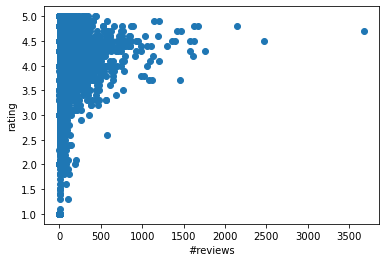

In [97]:
plt.scatter(numReview,avgRating)
plt.xlabel('#reviews')
plt.ylabel('rating')
plt.show()

In [98]:
X = numpy.matrix([[1,l] for l in numReview]) # Note the inclusion of the constant term
y = numpy.matrix(avgRating).T

In [99]:
theta,residuals,rank,s = numpy.linalg.lstsq(X, y, rcond=None)
theta

matrix([[ 4.36678584e+00],
        [-1.58589229e-04]])

In [100]:
xplot = numpy.arange(0,5501,10)
yplot = [(theta[0] + theta[1]*x).item() for x in xplot]

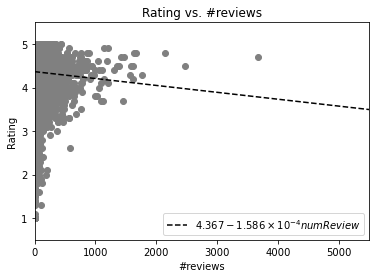

In [101]:
plt.scatter(numReview, avgRating, color='grey')
plt.plot(numpy.array(xplot), yplot, color = 'k', linestyle = '--',\
         label = r"$4.367 - 1.586 \times 10^{-4} \mathit{numReview}$")
plt.xlim(0, 5500)
plt.ylim(0.5, 5.5)
plt.xlabel("#reviews")
plt.ylabel("Rating")
plt.title("Rating vs. #reviews")
plt.legend(loc='lower right')
plt.show()

In [117]:
numReview=[]
avgRating=[]
for i in numReviewsPerBusiness:
    if numReviewsPerBusiness[i]<=50:
        numReview.append(numReviewsPerBusiness[i])
        avgRating.append(avgRatingBusiness[i])

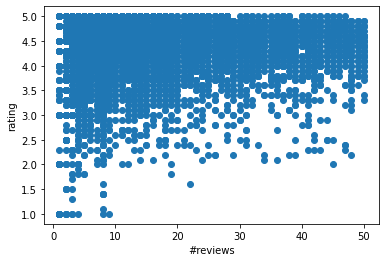

In [118]:
plt.scatter(numReview,avgRating)
plt.xlabel('#reviews')
plt.ylabel('rating')
plt.show()

In [119]:
X = numpy.matrix([[1,l] for l in numReview]) # Note the inclusion of the constant term
y = numpy.matrix(avgRating).T

In [120]:
theta,residuals,rank,s = numpy.linalg.lstsq(X, y, rcond=None)
theta

matrix([[ 4.39342617e+00],
        [-1.65876192e-03]])

In [121]:
xplot = numpy.arange(0,5501,10)
yplot = [(theta[0] + theta[1]*x).item() for x in xplot]

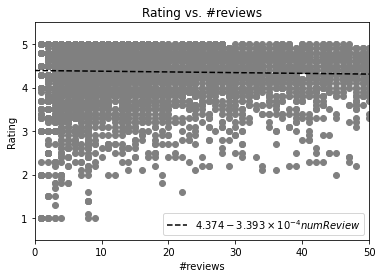

In [122]:
plt.scatter(numReview, avgRating, color='grey')
plt.plot(numpy.array(xplot), yplot, color = 'k', linestyle = '--',\
         label = r"$4.374 - 3.393 \times 10^{-4} \mathit{numReview}$")
plt.xlim(0, 50)
plt.ylim(0.5, 5.5)
plt.xlabel("#reviews")
plt.ylabel("Rating")
plt.title("Rating vs. #reviews")
plt.legend(loc='lower right')
plt.show()

In [16]:
len(reviewsPerUser)

278696

In [17]:
counts = [(len(reviewsPerBusiness[w]), w) for w in reviewsPerBusiness]
counts.sort()
counts.reverse()

In [18]:
counts[-10:]

[(1, '0x50cd1752c936ab3d:0x253dee787fedbd3e'),
 (1, '0x50cd17524f5ff56d:0x91f6c85540f98efb'),
 (1, '0x50cd16db7c1de033:0xab32eeaa6233480a'),
 (1, '0x50c61bd97153a1bb:0x953d98e15f74a619'),
 (1, '0x50c325197641c0d5:0x8cf168fe6dc2a26e'),
 (1, '0x50c2d81df84202ab:0x725766e662dbc740'),
 (1, '0x50c2d7f647b8c0e1:0x7367b209116041e2'),
 (1, '0x50c2d72a9a94f5e5:0x196d07f4d2f24fee'),
 (1, '0x50c2d620dfc34111:0x3435e47fc72dad9d'),
 (1, '0x4391e334d248f023:0xac18c5a8c5a71036')]

In [3]:
f = gzip.open("meta-Alaska.json.gz")
metaDataset = []
for l in f:
    metaDataset.append(json.loads(l))

In [20]:
metaDataset[11]

{'name': 'Java Hus Coffee Shop & Bakery',
 'address': 'Java Hus Coffee Shop & Bakery, 110 N Nordic Dr, Petersburg, AK 99833',
 'gmap_id': '0x54060392853cd7d3:0x169d5fac69e9b8a1',
 'description': None,
 'latitude': 56.812208399999996,
 'longitude': -132.95674359999998,
 'category': ['Coffee shop', 'Tea house'],
 'avg_rating': 3.8,
 'num_of_reviews': 8,
 'price': None,
 'hours': [['Wednesday', '6AM–6PM'],
  ['Thursday', '6AM–6PM'],
  ['Friday', '6AM–6PM'],
  ['Saturday', '6AM–6PM'],
  ['Sunday', '7AM–4PM'],
  ['Monday', '6AM–6PM'],
  ['Tuesday', '6AM–6PM']],
 'MISC': {'Service options': ['Delivery'],
  'Offerings': ['Coffee'],
  'Amenities': ['Good for kids']},
 'state': 'Permanently closed',
 'relative_results': ['0x5406038d565efc2d:0x869a2600edf93dac',
  '0x540603f1e3079d71:0xcd7e20adc1a4f497',
  '0x540603ee030a8997:0xb3716daf48621096',
  '0x54060392a3f82fb5:0xf15a4b759e4a63a8',
  '0x54060392aaa12b29:0xd95194106f5be94b'],
 'url': 'https://www.google.com/maps/place//data=!4m2!3m1!1s0x54

In [5]:
avgRatingBusiness=defaultdict(list)
for i in metaDataset:
    #print(i)
    avgRatingBusiness[i['gmap_id']]=(i['avg_rating'])

In [6]:
convertRatingDict=defaultdict(list)
for i in ratingDict:
    if ratingDict[i]==None:
        continue
    elif ratingDict[i]>=4:
        convertRatingDict[i]=(1)
    else:
        convertRatingDict[i]=(0)

In [7]:
predictRatingDict=defaultdict(list)
for i in convertRatingDict:
    business=str(i[1])
    rating=avgRatingBusiness[business]
    #print(rating)
    if rating>=4:
        predictRatingDict[i]=1
    else:
        predictRatingDict[i]=0

In [67]:
#predictRatingDict

In [8]:
y=[convertRatingDict[i] for i in convertRatingDict]
#y

In [9]:
y_pred=[predictRatingDict[i] for i in predictRatingDict]
#y_pred

In [10]:
numTrue=0
for i in range(len(y)):
    if y[i]==y_pred[i]:
        numTrue+=1

In [11]:
Accuracy=numTrue/len(y)
Accuracy

0.7871928594667451

In [64]:
MSE=0
for i in range(len(y)):
    MSE+=(y[i]-y_pred[i])**2
MSE=MSE/len(y)
MSE

0.21280714053325483

In [69]:
# plot ratings
ratingAvg=[]
for d in metaDataset:
    ratingAvg.append(d['avg_rating'])

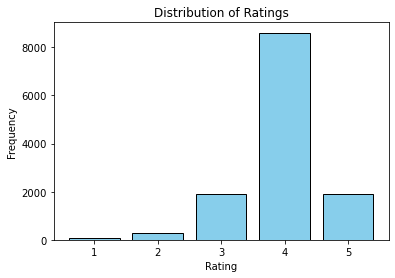

In [70]:
plt.hist(ratingAvg, bins=range(1, 7), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [11]:
avgRatings=[]
prices=[]
for d in metaDataset:
    if d['price']!=None:
        avgRatings.append(d['avg_rating'])
        prices.append(len(d['price'])) # $, $$, $$$

In [12]:
avgRatings[:10]

[4, 3, 4.7, 4.7, 3.6, 4, 4.1, 2.4, 4, 4.3]

In [13]:
prices[:10]

[2, 2, 2, 1, 2, 3, 2, 2, 1, 2]

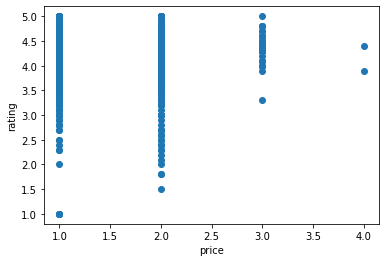

In [14]:
plt.scatter(prices,avgRatings)
plt.xlabel('price')
plt.ylabel('rating')
plt.show()

In [15]:
map_center = [sum(entry["latitude"] for entry in metaDataset) / len(metaDataset),
              sum(entry["longitude"] for entry in metaDataset) / len(metaDataset)]
business_map = folium.Map(location=map_center, zoom_start=10)

In [17]:
for business in metaDataset:
    folium.Marker(location=[business["latitude"], business["longitude"]],
                  popup=business["name"]).add_to(business_map)

In [18]:
business_map.save("business_locations_map.html")

<AxesSubplot:>

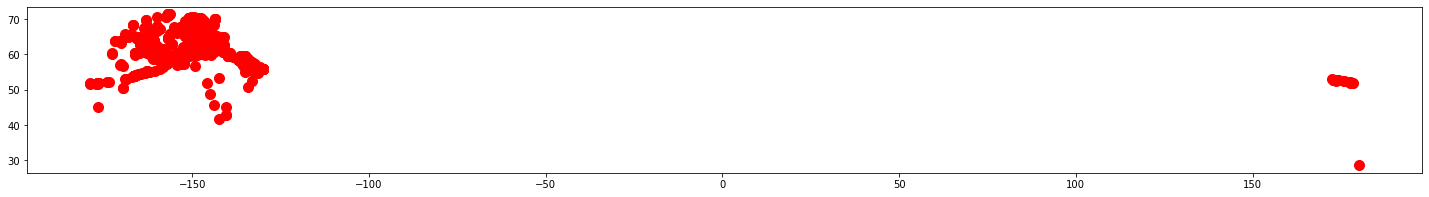

In [24]:
# Create a GeoDataFrame from the business_data
geometry = [Point(xy) for xy in zip([entry["longitude"] for entry in metaDataset],
                                   [entry["latitude"] for entry in metaDataset])]
gdf = gpd.GeoDataFrame(metaDataset, geometry=geometry)

# Plot the GeoDataFrame
gdf.plot(marker='o', color='red', markersize=100, figsize=(25, 24))

In [25]:
idName=defaultdict(set)
for d in metaDataset:
    idName[d['gmap_id']].add(d['name'])

In [26]:
idName

defaultdict(set,
            {'0x56b646ed2220b77f:0xd8975e316de80952': {'Bear Creek Cabins & RV Park'},
             '0x56c8992b5dee7225:0x9f7f4bf151868cf7': {'Anchorage Market'},
             '0x56c8e0455225be87:0xf24828df75e2f8ae': {'Happy Camper RV'},
             '0x56c8bdb5d91017cd:0xca19fd9afceed343': {'Cajun Corner'},
             '0x540c251956395673:0x16f5a4fe26c18931': {'Alaska General Seafoods'},
             '0x540c2519bcfa6ccd:0xb5e1489a820445f8': {'Tongass/Ketchikan National Forest'},
             '0x56e7db2908155f81:0xc57ff97f25ffe1ce': {'Silver Bay Seafoods'},
             '0x56c132808b88408d:0x138bcd1709abfdea': {'A Room With A View Bed & Breakfast'},
             '0x56c89632d94b816d:0x36d53dd6adaede05': {'Aurora Lodge'},
             '0x56c89940e51d7375:0xeb800d5fe82cbd11': {'City Taxi'},
             '0x5406038d706891a9:0x3b0075d07a52d830': {'Coastal Cold Storage Inc'},
             '0x54060392853cd7d3:0x169d5fac69e9b8a1': {'Java Hus Coffee Shop & Bakery'},
          

In [35]:
idAvgRating=defaultdict(set)
for d in metaDataset:
    idAvgRating[d['gmap_id']].add(d['avg_rating'])

In [36]:
idAvgRating

defaultdict(set,
            {'0x56b646ed2220b77f:0xd8975e316de80952': {4.5},
             '0x56c8992b5dee7225:0x9f7f4bf151868cf7': {4.2},
             '0x56c8e0455225be87:0xf24828df75e2f8ae': {4.4},
             '0x56c8bdb5d91017cd:0xca19fd9afceed343': {4.5},
             '0x540c251956395673:0x16f5a4fe26c18931': {4.7},
             '0x540c2519bcfa6ccd:0xb5e1489a820445f8': {4.6},
             '0x56e7db2908155f81:0xc57ff97f25ffe1ce': {4.1},
             '0x56c132808b88408d:0x138bcd1709abfdea': {5},
             '0x56c89632d94b816d:0x36d53dd6adaede05': {2.6},
             '0x56c89940e51d7375:0xeb800d5fe82cbd11': {3},
             '0x5406038d706891a9:0x3b0075d07a52d830': {4.8},
             '0x54060392853cd7d3:0x169d5fac69e9b8a1': {3.8},
             '0x5400df83fb9c9d4b:0x21e0a32758d7b33c': {4.8},
             '0x54011e7158b17b83:0x959d3ef705110323': {4},
             '0x5400df82e4ca2741:0x5c72dfc793b3cdfc': {4.7},
             '0x54011e1f313d46b3:0x63671effe038577d': {4.3},
             

In [37]:
idAvgRating['0x56b646ed2220b77f:0xd8975e316de80952'].pop()

4.5

In [27]:
idName['0x56c897b9ce6000df:0xd707e127588a8c6c']

{"Moose's Tooth Pub & Pizzeria"}

In [7]:
len(metaDataset)

12774

In [2]:
f = open("image_review_all.json")
data = []

for l in f:
    d = json.loads(l)
    data.append(d)
    
f.close()

In [3]:
data[0]

{'business_id': '605730f68cd0e3d69a52284b',
 'user_id': '113890892872599852766',
 'rating': 4,
 'review_text': 'We came for a birthday brunch and this place is so much bigger than it looks from the outside! It was totally packed and loud. Service was on the slower side. I ordered 2 mojitos: 1 lime and 1 mango. The ingredient weren’t really fresh, there wasn’t even any visible mango in the second one. Tasted like mango juice from concentrate. My food was really good though. I ordered the steak and eggs and I usually order my steak rare but this was skirt steak so they did a perfect medium. The sunny side up eggs were more cooked than I would have preferred but still good. They actually cooked the breakfast potatoes too, which was awesome. Will likely be back to try something else!',
 'pics': [{'id': 'AF1QipPrls2G30PS3tyC55KBxUrKgy3ER0AB5UJY57BZ',
   'url': ['https://lh5.googleusercontent.com/p/AF1QipPrls2G30PS3tyC55KBxUrKgy3ER0AB5UJY57BZ=w150-h150-k-no-p']},
  {'id': 'AF1QipOBdiu4hEPC45

In [4]:
len(data)

1487747

In [10]:
reviewsPerBusiness=defaultdict(set)
ratingsPerBusiness=defaultdict(set)
BusinessPerUser=defaultdict(set)
ratingDict=defaultdict(set)

for d in data:
    user,business = d['user_id'], d['business_id']
    reviewsPerBusiness[business].add(d['review_text'])
    BusinessPerUser[user].add(business)
    ratingsPerBusiness[business].add(d['rating'])
    ratingDict[(user,business)] = d['rating']   

In [12]:
len(reviewsPerBusiness)

64527

In [13]:
len(BusinessPerUser)

868937

In [18]:
numReviewsPerBusiness=defaultdict(list)
for i in reviewsPerBusiness:
    numReviewsPerBusiness[i].append(len(reviewsPerBusiness[i]))
print(numReviewsPerBusiness)

defaultdict(<class 'list'>, {'605730f68cd0e3d69a52284b': [234], '60572d91d2ad6b7a67e27fdf': [55], '60572d22c4674474cff912db': [25], '60572d189ffe343acca5fca5': [25], '60572c6df69c7b1178070364': [10], '60572c66d2ad6b7a67e27fde': [2], '60572c51f69c7b1178070363': [22], '60572c39d2ad6b7a67e27fdd': [7], '60572c39c4674474cff912d9': [8], '60572c18f69c7b1178070361': [195], '60572c13c4674474cff912d6': [21], '60572bed6fce2069470c619f': [11], '60572bdec4674474cff912d5': [5], '60572bb76fce2069470c619e': [21], '60572babc4674474cff912d2': [37], '60572ba7d2ad6b7a67e27fdb': [25], '60572b689ffe343acca5fca4': [7], '60572b5f6fce2069470c619d': [16], '60572b5ac4674474cff912d1': [4], '60572b4e8cd0e3d69a522845': [13], '60572b41f69c7b117807035f': [114], '60572b308cd0e3d69a522844': [12], '60572b14c4674474cff912d0': [10], '60572aff8cd0e3d69a522843': [9], '60572af99ffe343acca5fca3': [3], '60572ad0c4674474cff912cf': [7], '60572a74d2ad6b7a67e27fd9': [10], '60572a646fce2069470c619b': [62], '60572a4dd2ad6b7a67e27fd8

In [20]:
numReviewsPerBusiness['605730f68cd0e3d69a52284b'][0]

234

In [21]:
counts = [(numReviewsPerBusiness[w][0], w) for w in numReviewsPerBusiness]
counts.sort()
counts.reverse()

In [24]:
counts[-10:]

[(1, '60404c8ac6fcf1fddba09840'),
 (1, '60404aba65e4ba0588baf8a4'),
 (1, '6040473265e4ba0588baf4d4'),
 (1, '6040458365e4ba0588baf380'),
 (1, '6040440f65e4ba0588baf25e'),
 (1, '60403deec6fcf1fddba08b6d'),
 (1, '604031b0404b7eec2a7fe01f'),
 (1, '604030fc404b7eec2a7fdf73'),
 (1, '604030eb404b7eec2a7fdf6f'),
 (1, '60401cff9d447ef3f963f5ef')]

In [6]:
type(data[1])

dict

In [11]:
for i in data[1:]:
    i.pop('pics')

In [12]:
data[2]

{'business_id': '605730f68cd0e3d69a52284b',
 'user_id': '113495161718980109602',
 'rating': 2,
 'review_text': 'This place doesn’t rock the senses when it comes to flavors. Beautiful restaurant, great layout, art and fun upbeat music but here where the fun stuff ends.\nGreat plate presentations but unfortunately lacking in delivering the flavors needed for an all around satisfactory outcome.\nService was good, and attentive but I wish the food was as good.\nThe chicken was dry, the rice from uncle Ben era, and the tortillas & cheese needed more heat, and color. Salt 🧂 could have helped in perking up the blandness of the meal.\nSalsa was pretty good.\nBest'}

In [14]:
data[-1]

{'business_id': '60401a5466e8bd764351f091',
 'user_id': '116057206044139721905',
 'rating': 5,
 'review_text': '(Translated by Google) Excellent food, fair price\n\n(Original)\nExcelente food, fair price'}

In [20]:
wordCount = defaultdict(int)
for d in data:
    for w in d['review_text'].split():
        wordCount[w] += 1

len(wordCount)

966859

In [23]:
#punctuation removed
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    for w in r.split():
        wordCount[w] += 1

len(wordCount)

492620

In [29]:
#stemming
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
stemmer = PorterStemmer()
for d in data:
  r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
  for w in r.split():
    w = stemmer.stem(w)
    wordCount[w] += 1
    
len(wordCount)

KeyboardInterrupt: 

In [27]:
#Just build our feature vector by taking the most popular words (lowercase, punctuation removed, but no stemming)
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in data:
  r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
  for w in r.split():
    wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [28]:
counts[:10]

[(3192238, 'the'),
 (2310408, 'and'),
 (1426353, 'a'),
 (1360067, 'was'),
 (1137811, 'to'),
 (1102291, 'i'),
 (847034, 'is'),
 (804105, 'food'),
 (764767, 'of'),
 (713918, 'it')]

In [30]:
#Just build our feature vector by taking the most popular words (lowercase, punctuation removed, stemming)
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in data:
  r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
  for w in r.split():
    w = stemmer.stem(w)
    wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [31]:
counts[:10]

[(3192245, 'the'),
 (2310450, 'and'),
 (1426356, 'a'),
 (1360409, 'wa'),
 (1137864, 'to'),
 (1102293, 'i'),
 (851798, 'it'),
 (847034, 'is'),
 (812994, 'food'),
 (764771, 'of')]

In [35]:
words = [x[1] for x in counts[:1000]]

In [36]:
words[:10]

['the', 'and', 'a', 'wa', 'to', 'i', 'it', 'is', 'food', 'of']

In [37]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [42]:
def feature(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1) # offset
    return feat

In [51]:
data=data[:5000]
X = numpy.array([feature(d) for d in data])
y = numpy.array([d['rating'] for d in data])

In [52]:
# Regularized regression
clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(X, y)
theta = clf.coef_
predictions = clf.predict(X)

In [53]:
predictions

array([4.39091071, 5.08962499, 4.50401773, ..., 4.62168912, 3.52865408,
       4.71876178])

In [55]:
mse=sum([x**2 for x in (y - predictions)])/ len(y)
mse

0.5038100998295224

In [56]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    ws4 = [' '.join(x) for x in list(zip(ws[:-3],ws[1:-2],ws[2:-1],ws[3:]))]
    ws5 = [' '.join(x) for x in list(zip(ws[:-4],ws[1:-3],ws[2:-2],ws[3:-1],ws[4:]))]
    for w in ws + ws2 + ws3 + ws4 + ws5:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [57]:
counts[:100]

[(11452, 'the'),
 (8063, 'and'),
 (5082, 'a'),
 (4855, 'was'),
 (4290, 'to'),
 (3927, 'i'),
 (2980, 'is'),
 (2829, 'of'),
 (2735, 'food'),
 (2468, 'for'),
 (2460, 'it'),
 (2183, 'great'),
 (1973, 'in'),
 (1894, 'good'),
 (1798, 'we'),
 (1794, 'with'),
 (1713, 'this'),
 (1582, 'but'),
 (1494, 'my'),
 (1440, 'place'),
 (1402, 'you'),
 (1401, 'had'),
 (1377, 'service'),
 (1369, 'they'),
 (1346, 'on'),
 (1320, 'were'),
 (1294, 'very'),
 (1158, 'are'),
 (1090, 'that'),
 (1058, 'not'),
 (1032, 'have'),
 (1026, 'so'),
 (899, 'and the'),
 (887, 'delicious'),
 (841, 'be'),
 (839, 'at'),
 (839, 'as'),
 (811, 'the food'),
 (807, 'our'),
 (739, 'here'),
 (734, 'amazing'),
 (718, 'time'),
 (706, 'all'),
 (700, 'it was'),
 (668, 'if'),
 (667, 'best'),
 (661, 'there'),
 (653, 'of the'),
 (643, 'staff'),
 (616, 'nice'),
 (600, 'out'),
 (596, 'this place'),
 (588, 'like'),
 (586, 'friendly'),
 (575, 'back'),
 (565, 'one'),
 (560, 'just'),
 (559, 'really'),
 (551, 'from'),
 (546, 'by'),
 (544, 'their'),

In [60]:
def feature(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    ws4 = [' '.join(x) for x in list(zip(ws[:-3],ws[1:-2],ws[2:-1],ws[3:]))]
    ws5 = [' '.join(x) for x in list(zip(ws[:-4],ws[1:-3],ws[2:-2],ws[3:-1],ws[4:]))]
    for w in ws + ws2 + ws3 + ws4 + ws5:
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1) #offset
    return feat

In [61]:
X = numpy.array([feature(d) for d in data])
y = numpy.array([d['rating'] for d in data])

In [62]:
clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(X, y)
theta = clf.coef_
predictions = clf.predict(X)

In [63]:
wordSort = list(zip(theta[:-1], words))
wordSort.sort()

In [64]:
wordSort[:20]

[(-1.6123034332982713, 'worst'),
 (-1.3254351127014297, 'interest'),
 (-1.0343741749539495, 'rude'),
 (-0.9308545320183681, 'raw'),
 (-0.8096419852763551, 'money'),
 (-0.793226317207756, 'select'),
 (-0.7626800751369152, 'bland'),
 (-0.7359457639339942, 'longer'),
 (-0.7090923120807234, 'happen'),
 (-0.6608269558631522, 'bill'),
 (-0.6496953252395907, 'afford'),
 (-0.6491730238521289, 'low'),
 (-0.6460926696199162, 'seen'),
 (-0.6459718376647046, 'fajita'),
 (-0.6424247995764278, 'werent'),
 (-0.6334797272073848, 'strip'),
 (-0.6177948142143488, 'move'),
 (-0.5857303750080796, 'follow'),
 (-0.5845724678140517, 'fix'),
 (-0.5713465859815927, 'fruit')]

In [65]:
wordSort[-20:]

[(0.360313019528036, 'limit'),
 (0.36927474300023583, 'impress'),
 (0.37070648107890597, 'smoke'),
 (0.37081412097046496, 'origin'),
 (0.37084007422700876, 'suggest'),
 (0.38758532633748366, 'coconut'),
 (0.4020716512588726, 'later'),
 (0.408460949398526, 'chip'),
 (0.41622411835697154, 'mouth'),
 (0.4235134077990921, 'alway'),
 (0.43452264318842065, 'mcdonald'),
 (0.44018844097422843, 'glass'),
 (0.4416565448897781, 'bake'),
 (0.4628559609391924, 'four'),
 (0.47179309748887505, 'friday'),
 (0.4920137726910108, 'seem'),
 (0.5392101218798487, 'actual'),
 (0.6640871873390877, 'lime'),
 (0.7404896697357666, 'thick'),
 (0.7599700878724618, 'broth')]

In [66]:
ratings = [d['rating'] for d in data]
lengths = [len(d['review_text']) for d in data]

In [80]:
max(lengths)

3585

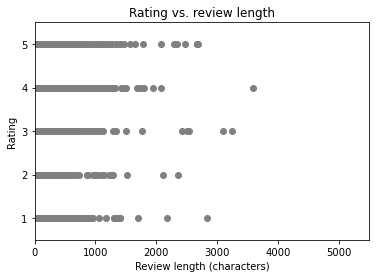

In [67]:
plt.scatter(lengths, ratings, color='grey')
plt.xlim(0, 5500)
plt.ylim(0.5, 5.5)
plt.xlabel("Review length (characters)")
plt.ylabel("Rating")
plt.title("Rating vs. review length")
plt.show()

In [68]:
X = numpy.matrix([[1,l] for l in lengths]) # Note the inclusion of the constant term
y = numpy.matrix(ratings).T

In [72]:
X=numpy.array(X)
y=numpy.array(y)

In [73]:
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [74]:
theta = model.coef_
theta

array([[ 4.66013181e+00, -7.95285216e-04]])

In [77]:
theta[0][0]

4.66013181005262

In [81]:
xplot = numpy.arange(0,3600,10)
yplot = [(theta[0][0] + theta[0][1]*x).item() for x in xplot]

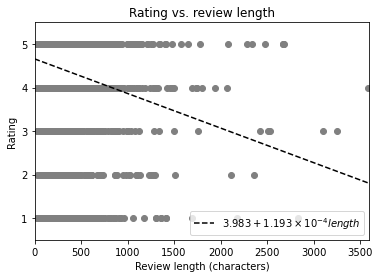

In [83]:
plt.scatter(lengths, ratings, color='grey')
plt.plot(numpy.array(xplot), yplot, color = 'k', linestyle = '--',\
         label = r"$3.983 + 1.193 \times 10^{-4} \mathit{length}$")
plt.xlim(0, 3600)
plt.ylim(0.5, 5.5)
plt.xlabel("Review length (characters)")
plt.ylabel("Rating")
plt.title("Rating vs. review length")
plt.legend(loc='lower right')
plt.show()